# Microwave grouper

The processes of beam bunching in a microwave buncher can be analyzed using the equations of longitudinal dynamics:

Equation for the change in particle momentum
$$
\frac{dp_z}{dt} = eE(z)\cos(\omega t + \phi_0)
$$

where $p_z$ is the longitudinal momentum of the particle, $e$ is the charge of the electron, $E(z)$ is the distribution of the magnitude of the longitudinal electric field along the axis of the buncher, $\omega$ is the angular frequency, and $\phi_0$ is the initial phase. Taking into account that the longitudinal momentum of a particle is $\beta\gamma m$, where $m$ is the rest mass of an electron, and $\beta$ and $\gamma$ are the usual relativistic factors of particles, equation can be rewritten as

Equation for the change in longitudinal phase space

$$
\frac{d(\gamma\beta)}{dt} = \left(\frac{e}{mc}\right)E(z)\cos(\omega t + \phi_0)
$$

The derivative $\frac{d\gamma \beta}{dt} = \dot{\gamma}\beta + \dot{\beta}\gamma $, where the dot indicates a derivative with respect to time, can be transformed as follows:
$$
\dot{\gamma} = \frac{d}{dt} \frac{1}{\sqrt{1-\beta^2}} = \beta \gamma^3 \dot{\beta}.
$$

Then takes the form:
$$
\frac{d\gamma \beta}{dt} = \gamma \dot{\beta} (\gamma^2 \beta^2 + 1) = \frac{e}{mc} E(z) \cos(\omega t + \varphi_0).
$$

If we assume that the longitudinal velocity of the particle is much smaller than the transverse velocity $\gamma \beta_{\alpha, r} \ll \gamma \beta$, then $\gamma^2 = \gamma^2 \beta^2 + 1$, and transitioning to the longitudinal coordinate $dt = \frac{dz}{\beta c}$, we get:
$$
\frac{d\beta}{dz} \frac{\beta }{(1-\beta^2)^{3/2}} = \frac{E(z)}{U_0} \cos(\varphi + \varphi_0),
$$

where $U_0 = mc^2/e$ - is the rest energy of the electron in volts, $\varphi$ - is the phase of the moving particle relative to the electrical component of the CBM field:
$$
\frac{d\varphi}{dz} = \frac{\omega}{\beta c}.
$$

D:\TMP\ipykernel_8688\2113458680.py:21: RuntimeWarning: invalid value encountered in power
  dbeta_dz = (E0 / U0) * np.cos(phi + phi_0) * ((1 - beta**2)**(3/2)) / beta


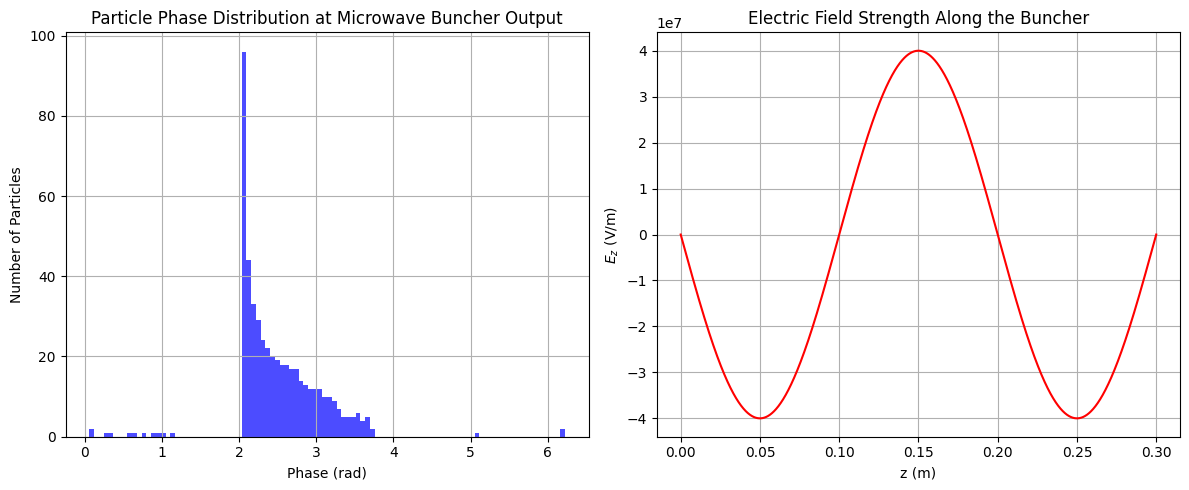

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
U0 = 511e3  # Rest energy of the electron in eV (mc^2/e)
c = 3e8  # Speed of light in vacuum (m/s)
omega = 2 * np.pi * 1e9  # Angular frequency (for example, 1 GHz)
f = 1.5 * 1e9  # Frequency
phi_0 = 0  # Initial phase
E0 = -40e6  # Electric field strength in V/m (example value)
dz = 1e-6  # Step size in m
z_max = 0.3  # Length of the buncher in m
num_particles = 1_000  # Number of particles

# Initial conditions
betas = np.full(num_particles, 0.7)  # Initial beta for all particles
phis = np.linspace(0, np.pi, num_particles)  # Uniform distribution of initial phases

# Function to calculate derivatives
def derivatives(beta, phi):
    dbeta_dz = (E0 / U0) * np.cos(phi + phi_0) * ((1 - beta**2)**(3/2)) / beta
    dphi_dz = omega / (beta * c)
    return dbeta_dz, dphi_dz

# Function to calculate Ez(z)
def E_z(z):
    return E0 * np.sin(2 * np.pi * f * z / c + phi_0)

# Solving the system using Euler's method
z_values = np.arange(0, z_max, dz)
betas_values = []
phis_values = []

for z in z_values:
    dbeta_dz, dphi_dz = derivatives(betas, phis)
    betas += dbeta_dz * dz
    phis += dphi_dz * dz
    betas_values.append(betas.copy())
    phis_values.append(phis.copy())

# Correcting phase to be within [0, 2*pi]
phis = phis % (2 * np.pi)

# Plotting the histogram of particle phases at the output
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(phis, bins=100, color='blue', alpha=0.7)
plt.xlabel('Phase (rad)')
plt.ylabel('Number of Particles')
plt.title('Particle Phase Distribution at Microwave Buncher Output')
plt.grid(True)

# Plotting Ez(z)
Ez_values = E_z(z_values)
plt.subplot(1, 2, 2)
plt.plot(z_values, Ez_values, label='$E_z(z)$', color='red')
plt.xlabel('z (m)')
plt.ylabel('$E_z$ (V/m)')
plt.title('Electric Field Strength Along the Buncher')
plt.grid(True)
plt.tight_layout()
plt.show()
